## Import All Libraries

In [1]:
#Using COVID API 
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime

### Fetch JSON Object from URL 

In [2]:

'''
  Function Name: get_json
  Description : Fetches the JSON output from API 
  input:<api_url>
  output: JSON Payload

'''

def get_json(api_url):
  response = requests.get(api_url)
  if response.status_code == 200:
    return json.loads(response.content.decode('utf-8'))
  else:
    return None

## Fetch the COVID Payload from URL for Singapore 

In [6]:

# Assign the URL 
covid_url = 'https://api.covid19api.com/total/dayone/country/singapore/status/confirmed'
covid_url='https://api.covid19api.com/country/singapore/status/confirmed'

# Fetch the data
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

# Convert to Dataframe

df_covid_worldwide['month_year'] = pd.to_datetime(df_covid_worldwide['Date']).dt.to_period('M')

# Group by Month and sum the cases per month 
df2 = df_covid_worldwide.groupby('month_year')['Cases'].sum()

#df_covid_worldwide.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


## Plot the Result

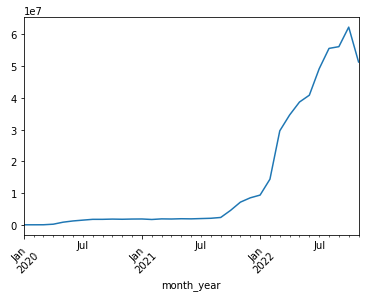

In [4]:

# plot the result
df2.plot()
plt.xticks(rotation=45)
plt.show()

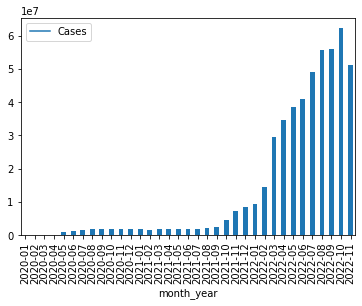

In [5]:
#group data by product and display sales as line chart
df_covid_worldwide.groupby('month_year')['Cases'].sum().plot(legend=True)
df2.plot.bar(stacked=True);